## Assignment 3 Part 1

In [146]:
import numpy as np
import matplotlib.pyplot as plt
import random
from tqdm import tqdm

# Gridworld dimensions
grid_size = 5

# Total episodes
T_episodes = 10000

# Discount factor
gamma = 0.95

# Exploration factor
epsilon = 0.01          #ideal 0.01

# Step size
alpha = 0.1

# Define the actions
actions = ['up', 'down', 'left', 'right']
action_probs = [0.25, 0.25, 0.25, 0.25]

# Initialize Q-table with zeros
Q = np.zeros((grid_size, grid_size, len(actions)))

# Define the special states and their effects
special_states = {
    (2, 0): (4, 0, -20),
    (2, 1): (4, 0, -20),
    (2, 3): (4, 0, -20),
    (2, 4): (4, 0, -20),
}

# Returen next S' and R(t+1) once St and At is given
def get_next_state_and_reward(state, action):
    if state in special_states:
        return special_states[state][:2], special_states[state][2]

    x, y = state
    if action == 'up':
        x = max(x - 1, 0)
    elif action == 'down':
        x = min(x + 1, grid_size - 1)
    elif action == 'left':
        y = max(y - 1, 0)
    elif action == 'right':
        y = min(y + 1, grid_size - 1)

    # reward is -1 for normal stps, -1 for attempts to step off the grid
    reward = 0
    if (x, y) == state:  # Attempt to step off the grid
        reward = -1
    elif (x,y)== (0,0): # Terminal points
        reward = 0      
    elif (x,y)== (0,4): # Terminal points
        reward = 0      
    else:
        reward = -1   # Normal step
    return (x, y), reward

# generate total episode        
def generate_episode():
    episode = []
    state = (4,0) # pre fixed starting point
    while True:
        # action = random.choice(actions) # need to replace with epsilon greedy algo
        action = choose_action(state, Q, epsilon)
        next_state, reward = get_next_state_and_reward(state, action)
        episode.append((state, action, reward))
        state = next_state
        if state==(0,0) or state==(0,4):
            break
    return episode

# Epsilon greedy algorithm
def choose_action(state, Q, epsilon):
    if np.random.rand() < epsilon:
        return random.choice(actions)  # Exploration
    else:
        x, y = state
        return actions[np.argmax(Q[x, y])]

In [99]:
# Function to plot the gridworld
def plot_gridworld(policy,Title):
    grid_size = 5
    fig, ax = plt.subplots(figsize=(8, 8))

    rect1 = plt.Rectangle((-0.5,-0.5), 1, 1, facecolor='black', edgecolor='black') # Terminal
    ax.add_patch(rect1)
    rect2 = plt.Rectangle((3.5,-0.5), 1, 1, facecolor='black', edgecolor='black') # Terminal
    ax.add_patch(rect2)
    rect3 = plt.Rectangle((-0.5,1.5), 2, 1, facecolor='red', edgecolor='red') #left wall
    ax.add_patch(rect3)
    rect5 = plt.Rectangle((-0.5,3.5), 1, 1, facecolor='blue', edgecolor='blue') #Start cell
    ax.add_patch(rect5)
    rect6 = plt.Rectangle((2.5,1.5), 2, 1, facecolor='red', edgecolor='red') #right wall
    ax.add_patch(rect6)

    for i in range(grid_size):
        for j in range(grid_size):
            # ax.text(j, i, round(policy[i,j],2), ha='center', va='center', fontsize=8)
            ax.text(j, i, policy[i,j], ha='center', va='center', fontsize=8)

    
    ax.set_xticks(np.arange(grid_size))
    ax.set_yticks(np.arange(grid_size))
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.grid(which='both')
    ax.set_xticks(np.arange(-0.5, grid_size, 1), minor=False)
    ax.set_yticks(np.arange(-0.5, grid_size, 1), minor=False)
    ax.grid(which='minor', color='black', linestyle='-', linewidth=2)
    plt.title(Title)
    plt.gca().invert_yaxis()
    plt.show()

In [46]:
# Test Envirronment
get_next_state_and_reward(state, 'right')

((3, 4), -1)

In [42]:
# Test Q table values
state=(3,4)
print(Q[state])
print(np.argmax(Q[state]))
print(actions[np.argmax(Q[state])])

[-4.7743737  -4.40657208 -4.46339419 -4.43374886]
1
down


## SARSA Algorithm

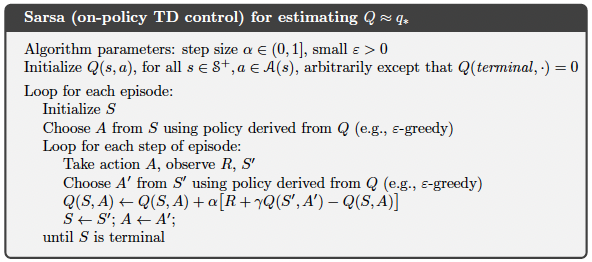

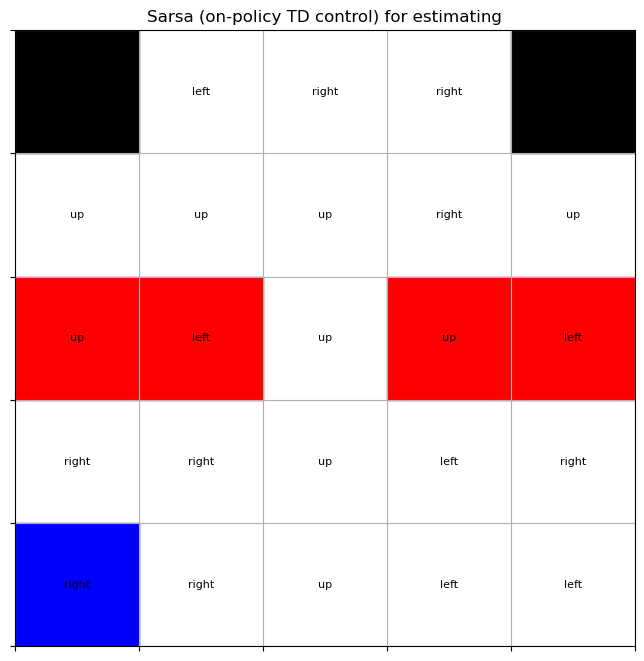

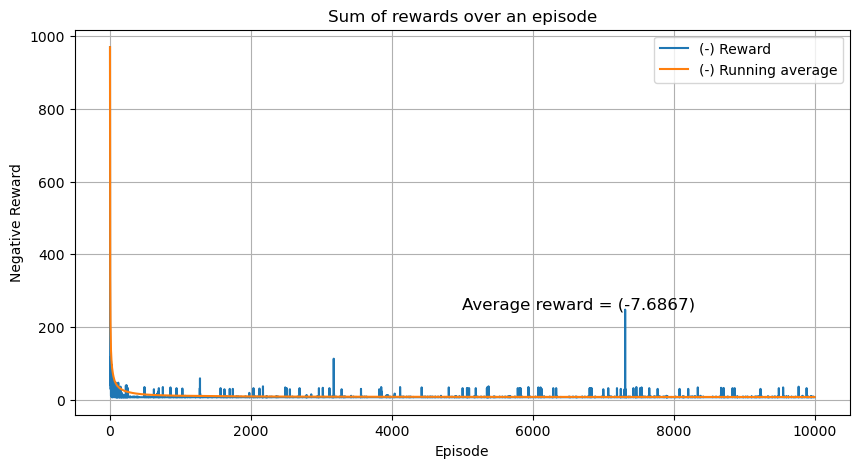

In [178]:
# Initialize Q-table with zeros
Q = np.zeros((grid_size, grid_size, len(actions)))
total_reward=np.zeros(T_episodes)

# Exploration factor
epsilon = 0.01       

# Step size
alpha = 0.1

# Learning algorithm
for episode in range(T_episodes):
    state = (4, 0)  # Initialize S
    action = choose_action(state, Q, epsilon) # Choose action from epsilon greedy policy
    while True:  # loop for each step of episodes
        next_state, reward = get_next_state_and_reward(state, action) # take action and observe reward and S'
        next_action = choose_action(next_state, Q, epsilon) # chooes A' from S' and epsilon greedy policy
        # breaking down the variables
        x, y = state
        next_x, next_y = next_state
        action_index = actions.index(action)
        next_action_index = actions.index(next_action)   
        # Q-learning update rule
        Q[x, y, action_index] += alpha * (reward + gamma * Q[next_x, next_y, next_action_index] - Q[x, y, action_index])    
        # Update State, Action and reward
        total_reward[episode] += reward
        state = next_state
        action=next_action
        if state==(0,0) or state==(0,4): # Untill S is terminal
            break

# Updating policy
optimum_policy={}
# Calculate optimum policy
for y in range(grid_size):
    for x in range(grid_size):
        optimum_policy[x,y] = actions[np.argmax(Q[x,y])]

# Plot optimum policy
OA=np.full((grid_size, grid_size), "", dtype=object)
for x in range(grid_size):
    for y in range(grid_size):
        OA[x, y] = optimum_policy[x, y]
plot_gridworld(OA,"Sarsa (on-policy TD control) for estimating")

# Calculate runnignaverage of rewards
r_avg=np.zeros(T_episodes)
for j in range(T_episodes):
    r_avg[j]= np.mean(total_reward[:j+1])

# Plot reward distribution
plt.figure(figsize=(10, 5))
plt.plot(-total_reward, label='(-) Reward')
plt.plot(-r_avg, label='(-) Running average')
plt.text(T_episodes/2, 250, 'Average reward = (%s) '%(np.mean(total_reward)), fontsize = 12)
plt.title('Sum of rewards over an episode')
plt.xlabel('Episode')
plt.ylabel('Negative Reward')
plt.legend()
plt.grid(True)
plt.show()

## Q-Learning algorithm

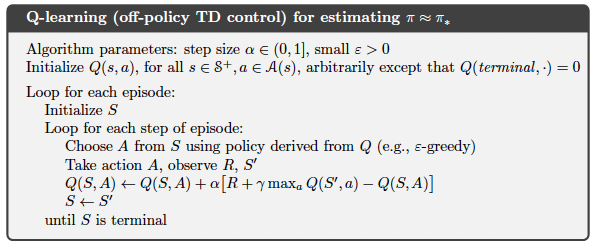

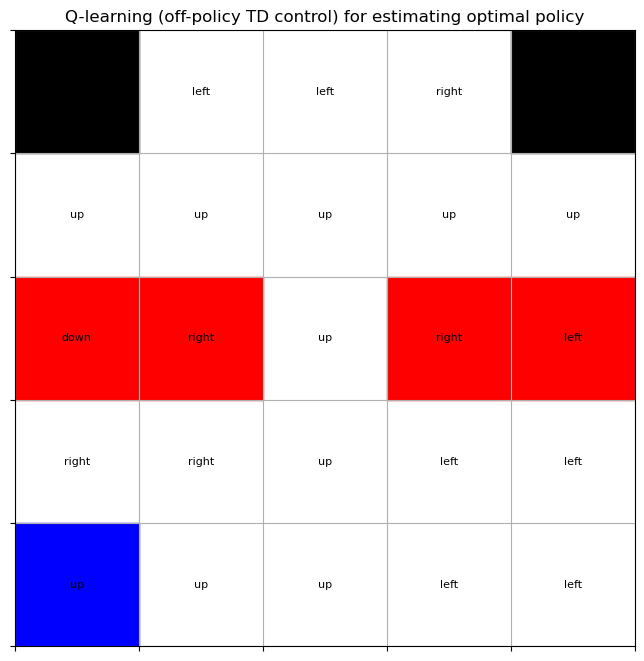

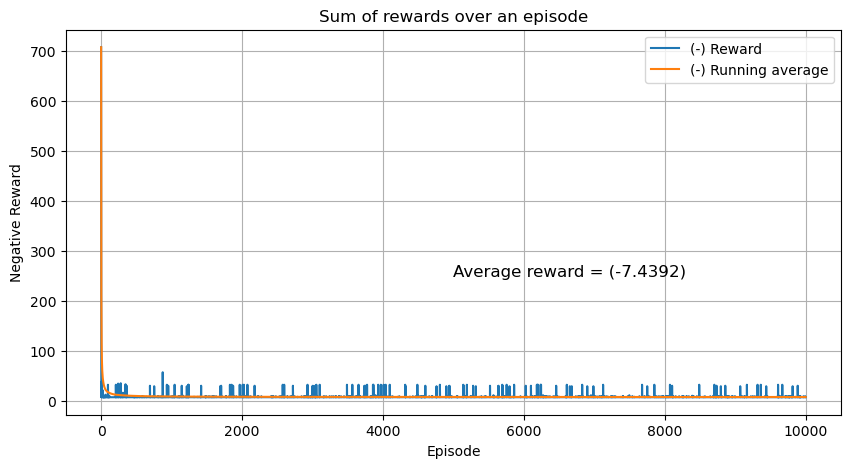

In [202]:
# Initialize Q-table with zeros
Q = np.zeros((grid_size, grid_size, len(actions)))
total_reward=np.zeros(T_episodes)

# Exploration factor
epsilon = 0.01       

# Step size
alpha = 0.5

# Learning algorithm
for episode in range(T_episodes):
    state = (4, 0)  # Initialize S
    while True:  # loop for each step of episodes
        action = choose_action(state, Q, epsilon) # Choose action from epsilon greedy policy
        next_state, reward = get_next_state_and_reward(state, action) # take action and observe reward and S'
        # breaking down the variables
        x, y = state
        next_x, next_y = next_state
        action_index = actions.index(action)  
        # Q-learning update rule
        Q[x, y, action_index] += alpha * (reward + gamma * Q[next_x, next_y, np.argmax(Q[next_state])] - Q[x, y, action_index])    
        # Update State and reward    
        state = next_state
        total_reward[episode] += reward
        if state==(0,0) or state==(0,4): # Untill S is terminal
            break

# Upddating policy
optimum_policy={}
# Calculate optimum policy
for y in range(grid_size):
    for x in range(grid_size):
        optimum_policy[x,y] = actions[np.argmax(Q[x,y])]

# Plot optimum policy
OA=np.full((grid_size, grid_size), "", dtype=object)
for x in range(grid_size):
    for y in range(grid_size):
        OA[x, y] = optimum_policy[x, y]
plot_gridworld(OA,"Q-learning (off-policy TD control) for estimating optimal policy")

# Calculate runnignaverage of rewards
r_avg=np.zeros(T_episodes)
for j in range(T_episodes):
    r_avg[j]= np.mean(total_reward[:j+1])

# Plot reward distribution
plt.figure(figsize=(10, 5))
plt.plot(-total_reward, label='(-) Reward')
plt.plot(-r_avg, label='(-) Running average')
plt.text(T_episodes/2, 250, 'Average reward = (%s) '%(np.mean(total_reward)), fontsize = 12)
plt.title('Sum of rewards over an episode')
plt.xlabel('Episode')
plt.ylabel('Negative Reward')
plt.legend()
plt.grid(True)
plt.show()

In [58]:
print(generate_episode())

[((4, 0), 'up', -1), ((3, 0), 'right', -1), ((3, 1), 'right', -1), ((3, 2), 'up', -1), ((2, 2), 'up', -1), ((1, 2), 'up', -1), ((0, 2), 'left', -1), ((0, 1), 'left', 0)]
